In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
sns.set_theme(color_codes=True)

In [2]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt

In [7]:
df=pd.read_csv('CVD_cleaned.csv')

In [8]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [12]:
df.select_dtypes(include='object').nunique()

General_Health      5
Checkup             5
Exercise            2
Heart_Disease       2
Skin_Cancer         2
Other_Cancer        2
Depression          2
Diabetes            4
Arthritis           2
Sex                 2
Age_Category       13
Smoking_History     2
dtype: int64

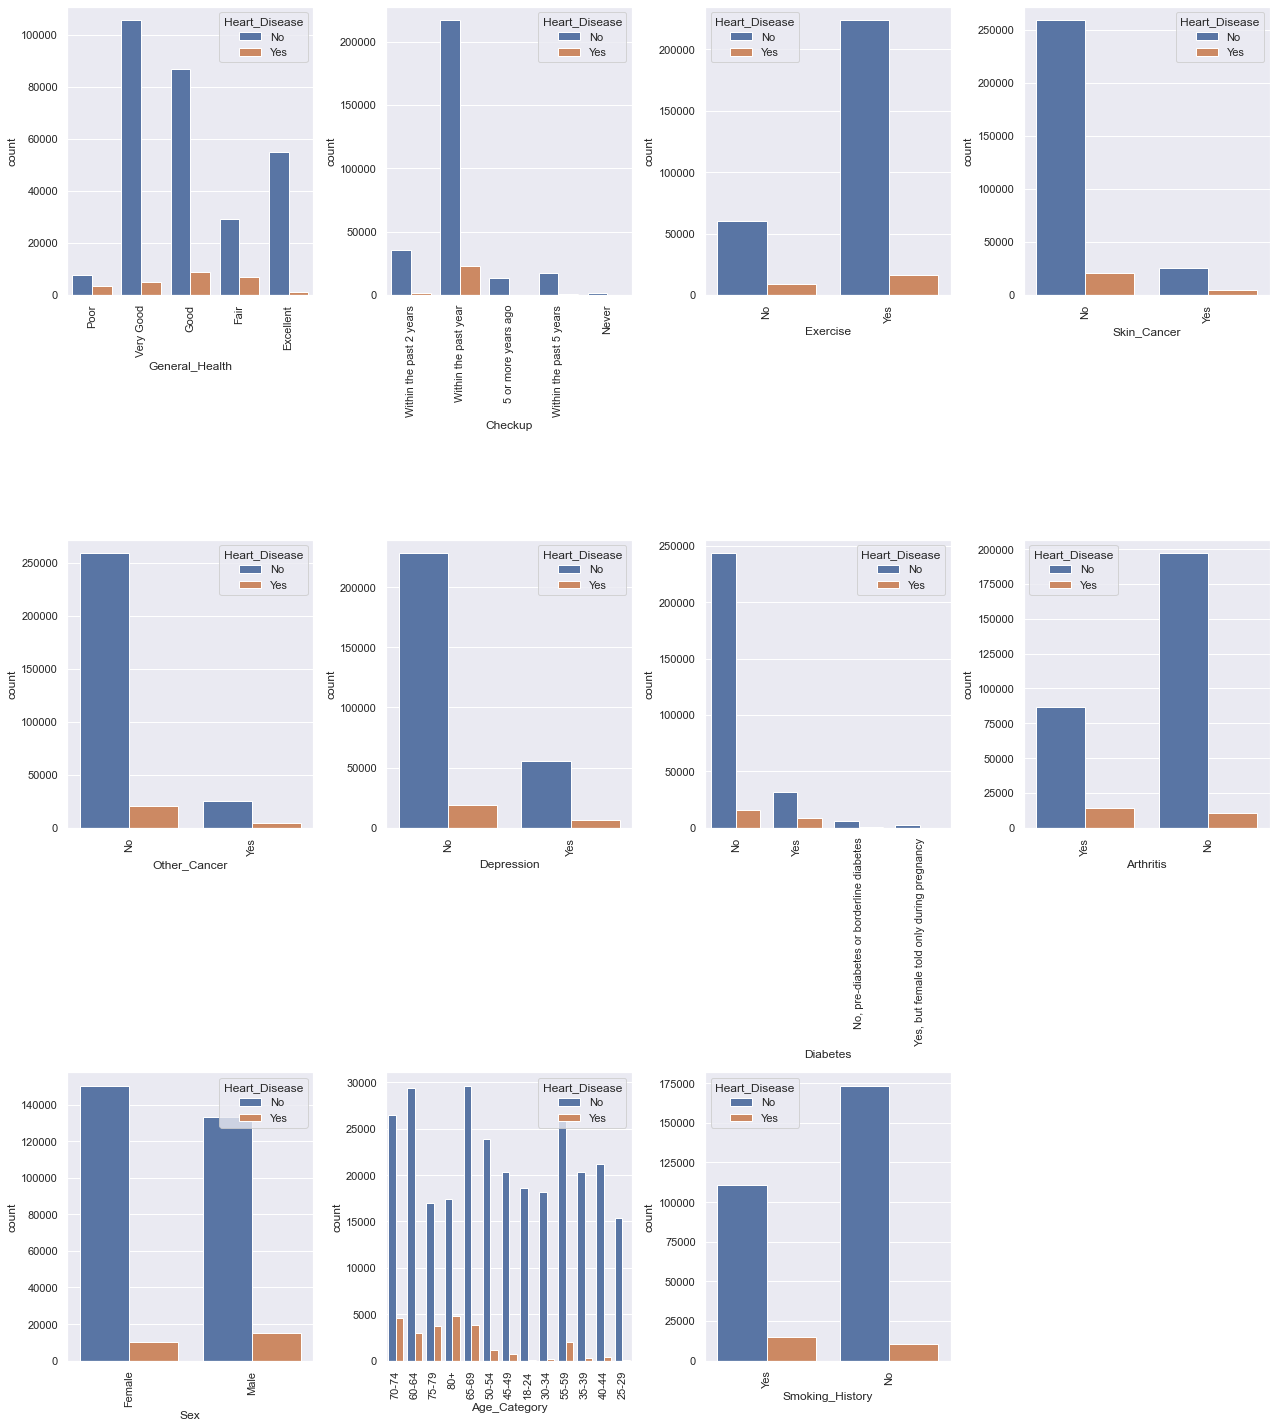

In [15]:
cat_vars=['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer', 'Other_Cancer','Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Smoking_History']

fig,axs = plt.subplots(nrows=3,ncols=4,figsize=(18,20))
axs = axs.flatten()

for i,var in enumerate(cat_vars):
    sns.countplot(x=var,hue='Heart_Disease', data=df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
    
fig.tight_layout()
fig.delaxes(axs[11])
plt.show()

In [18]:
import warnings
warnings.filterwarnings('ignore')

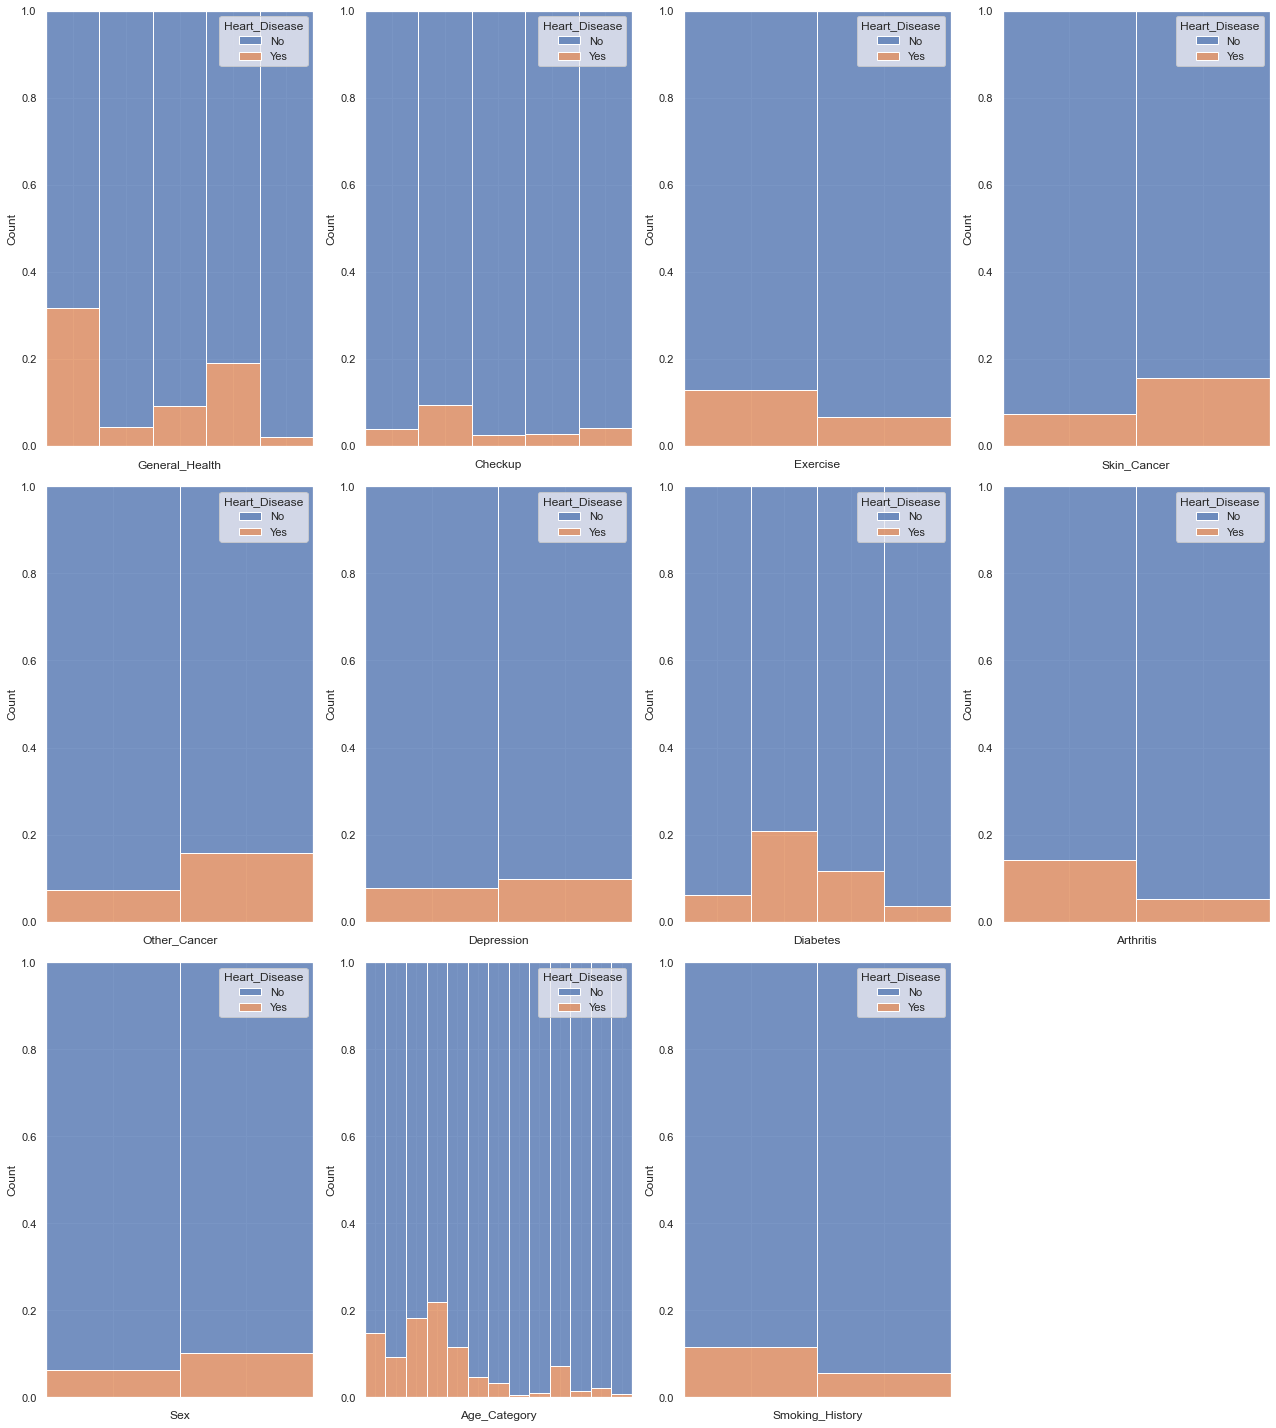

In [20]:
cat_vars=['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer', 'Other_Cancer','Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Smoking_History']

fig,axs = plt.subplots(nrows=3,ncols=4,figsize=(18,20))
axs = axs.flatten()

for i,var in enumerate(cat_vars):
    sns.histplot(x=var,hue='Heart_Disease', data=df, ax=axs[i], multiple="fill", kde=False, element='bars')
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
    axs[i].set_xlabel(var)
    
fig.tight_layout()
fig.delaxes(axs[11])
plt.show()

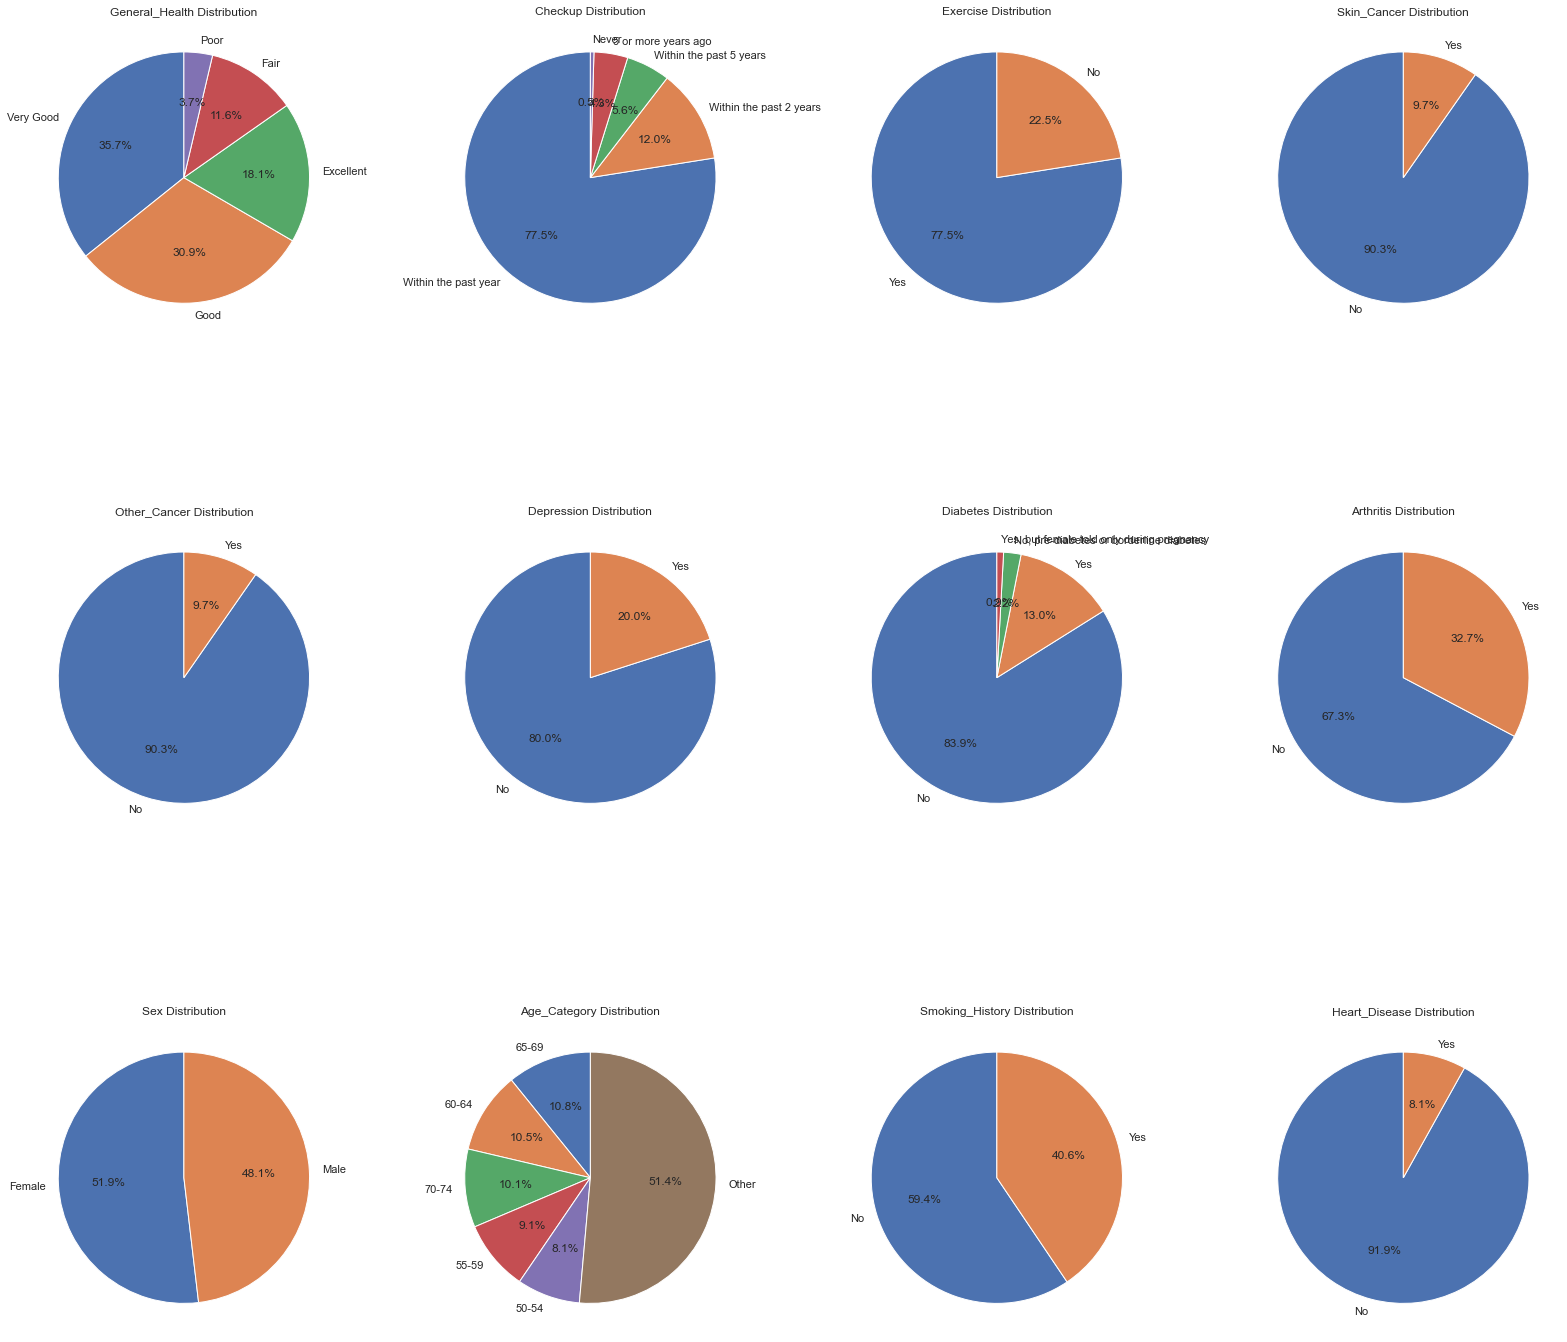

In [21]:
max_categories=5

cat_vars = ['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer', 'Other_Cancer',
            'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Smoking_History', 'Heart_Disease']

# Create a figure and axes
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(22, 22))

# Create a pie chart for each categorical variable
for i, var in enumerate(cat_vars):
    if i < len(axs.flat):
        # Count the number of occurrences for each category
        cat_counts = df[var].value_counts()

        # Group categories beyond the top max_categories as 'Other'
        if len(cat_counts) > max_categories:
            cat_counts_top = cat_counts[:max_categories]
            cat_counts_other = pd.Series(cat_counts[max_categories:].sum(), index=['Other'])
            cat_counts = cat_counts_top.append(cat_counts_other)

        # Create a pie chart
        axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)

        # Set a title for each subplot
        axs.flat[i].set_title(f'{var} Distribution')

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

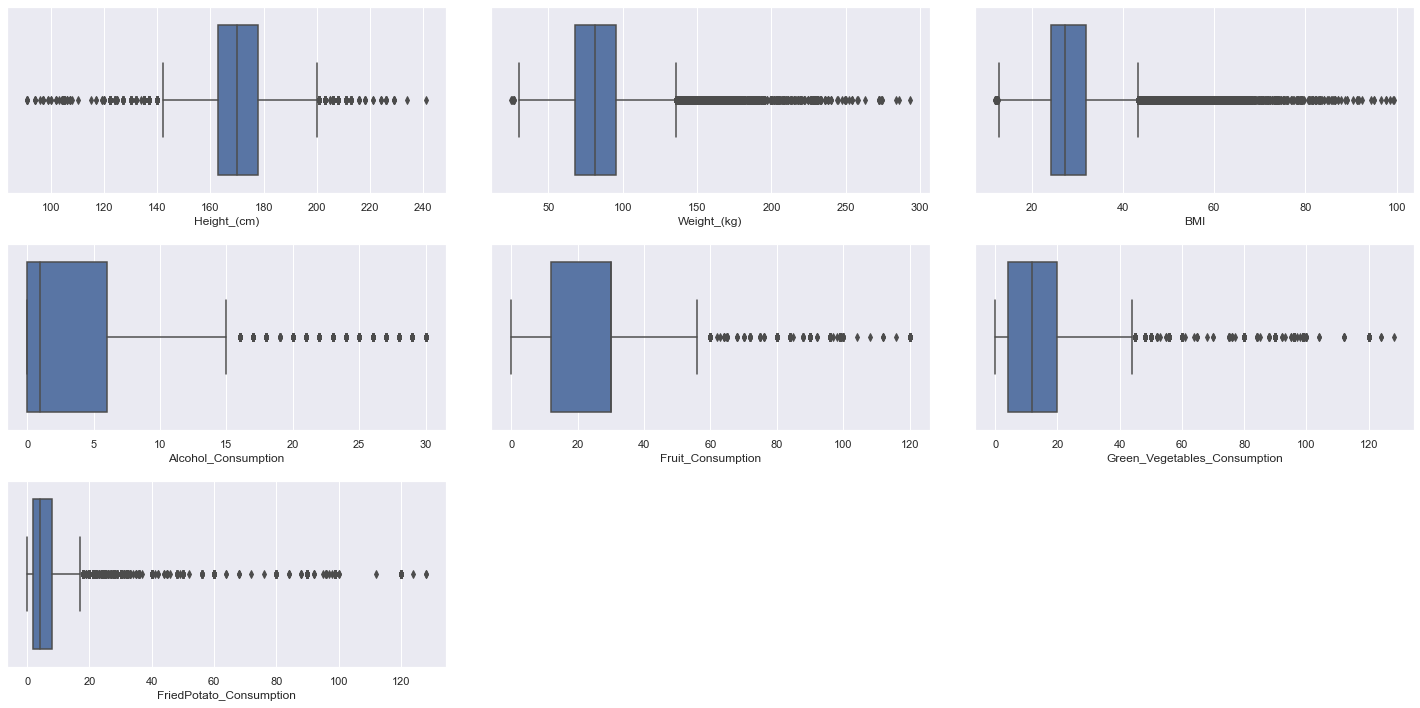

In [22]:
num_vars = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 
            'Fruit_Consumption','Green_Vegetables_Consumption', 'FriedPotato_Consumption']

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

# remove the 8th subplot
fig.delaxes(axs[7])

# remove the 9th subplot
fig.delaxes(axs[8])

plt.show()

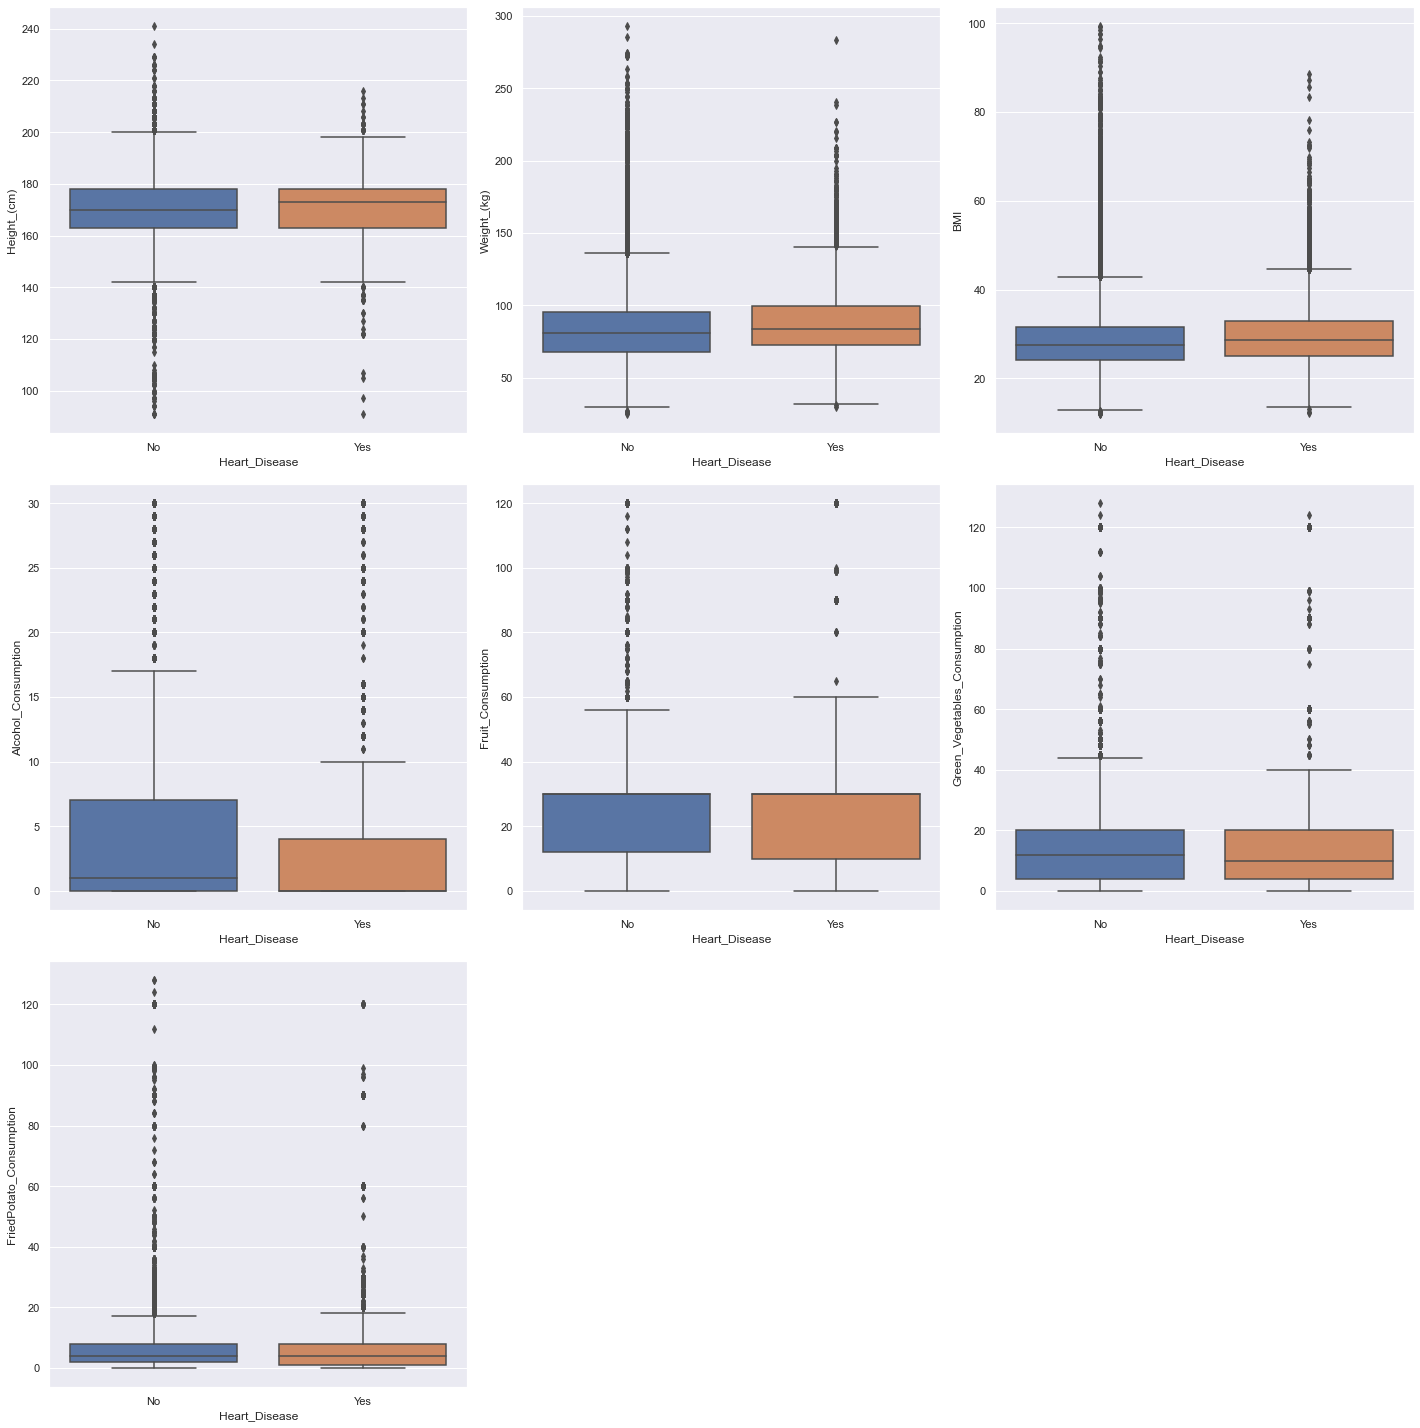

In [23]:
num_vars = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 
            'Fruit_Consumption','Green_Vegetables_Consumption', 'FriedPotato_Consumption']

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(y=var, x='Heart_Disease', data=df, ax=axs[i])

fig.tight_layout()

# remove the 8th subplot
fig.delaxes(axs[7])

# remove the 9th subplot
fig.delaxes(axs[8])

plt.show()

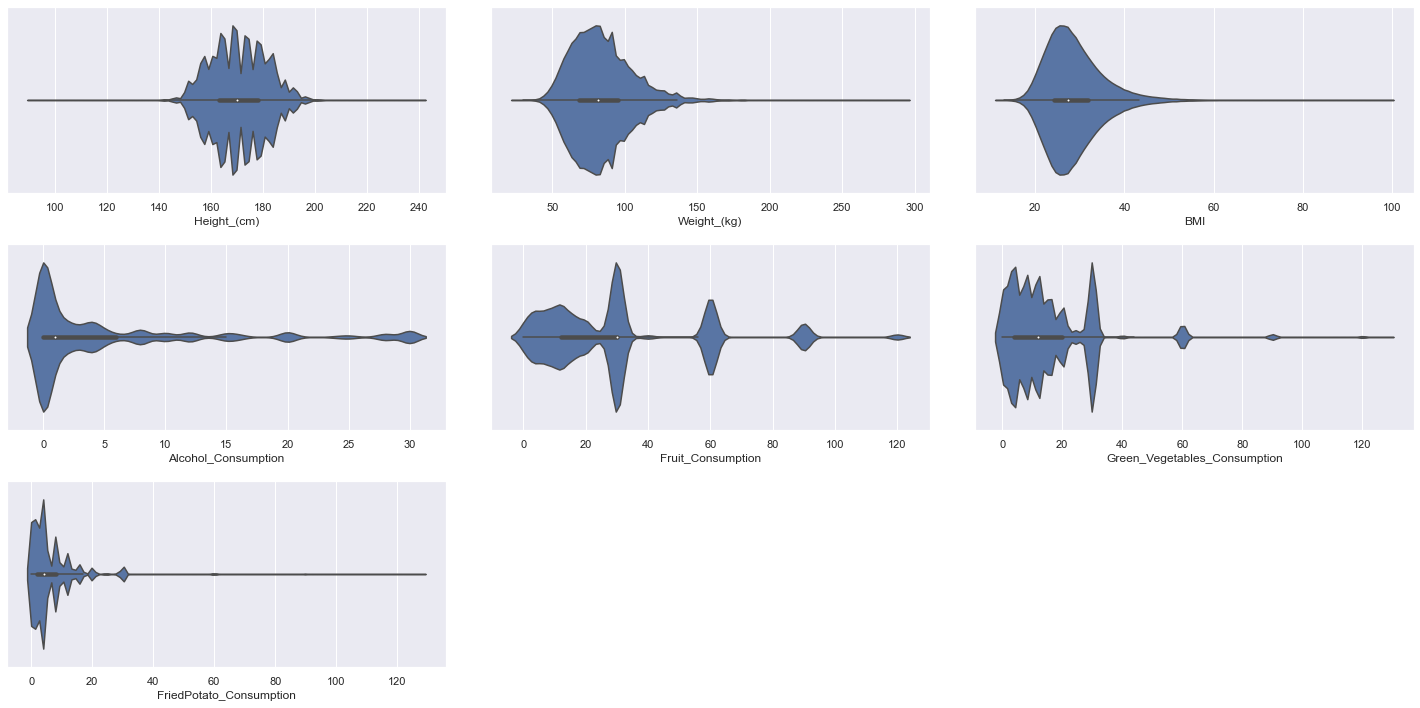

In [24]:
num_vars = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 
            'Fruit_Consumption','Green_Vegetables_Consumption', 'FriedPotato_Consumption']

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

# remove the 8th subplot
fig.delaxes(axs[7])

# remove the 9th subplot
fig.delaxes(axs[8])

plt.show()

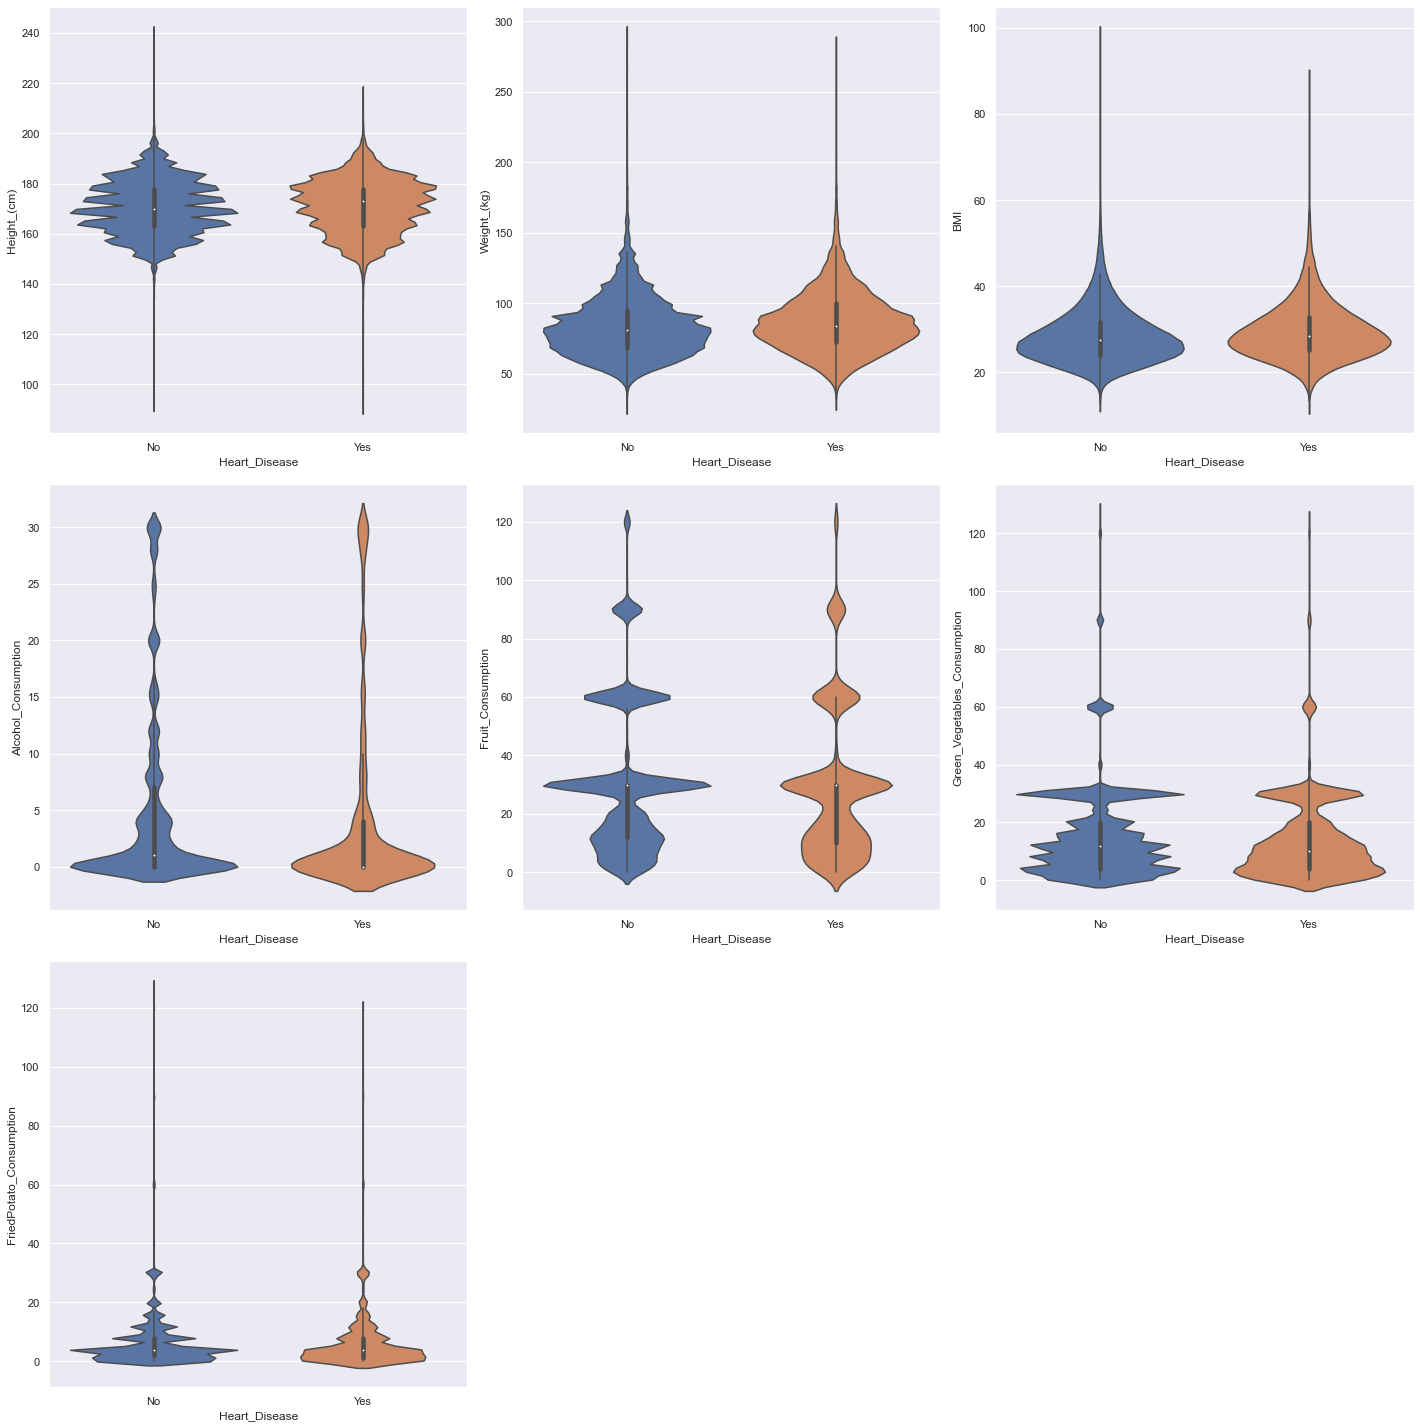

In [25]:
num_vars = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 
            'Fruit_Consumption','Green_Vegetables_Consumption', 'FriedPotato_Consumption']

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(y=var, data=df, x='Heart_Disease', ax=axs[i])

fig.tight_layout()

# remove the 8th subplot
fig.delaxes(axs[7])

# remove the 9th subplot
fig.delaxes(axs[8])

plt.show()

In [26]:
#Check missing value
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

In [27]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Print the column name and the unique values
    print(f"{col}: {df[col].unique()}")

General_Health: ['Poor' 'Very Good' 'Good' 'Fair' 'Excellent']
Checkup: ['Within the past 2 years' 'Within the past year' '5 or more years ago'
 'Within the past 5 years' 'Never']
Exercise: ['No' 'Yes']
Heart_Disease: ['No' 'Yes']
Skin_Cancer: ['No' 'Yes']
Other_Cancer: ['No' 'Yes']
Depression: ['No' 'Yes']
Diabetes: ['No' 'Yes' 'No, pre-diabetes or borderline diabetes'
 'Yes, but female told only during pregnancy']
Arthritis: ['Yes' 'No']
Sex: ['Female' 'Male']
Age_Category: ['70-74' '60-64' '75-79' '80+' '65-69' '50-54' '45-49' '18-24' '30-34'
 '55-59' '35-39' '40-44' '25-29']
Smoking_History: ['Yes' 'No']


In [28]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()
    
    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())
    
    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])
    
    # Print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

General_Health: [3 4 2 1 0]
Checkup: [2 4 0 3 1]
Exercise: [0 1]
Heart_Disease: [0 1]
Skin_Cancer: [0 1]
Other_Cancer: [0 1]
Depression: [0 1]
Diabetes: [0 2 1 3]
Arthritis: [1 0]
Sex: [0 1]
Age_Category: [10  8 11 12  9  6  5  0  2  7  3  4  1]
Smoking_History: [1 0]


<AxesSubplot:>

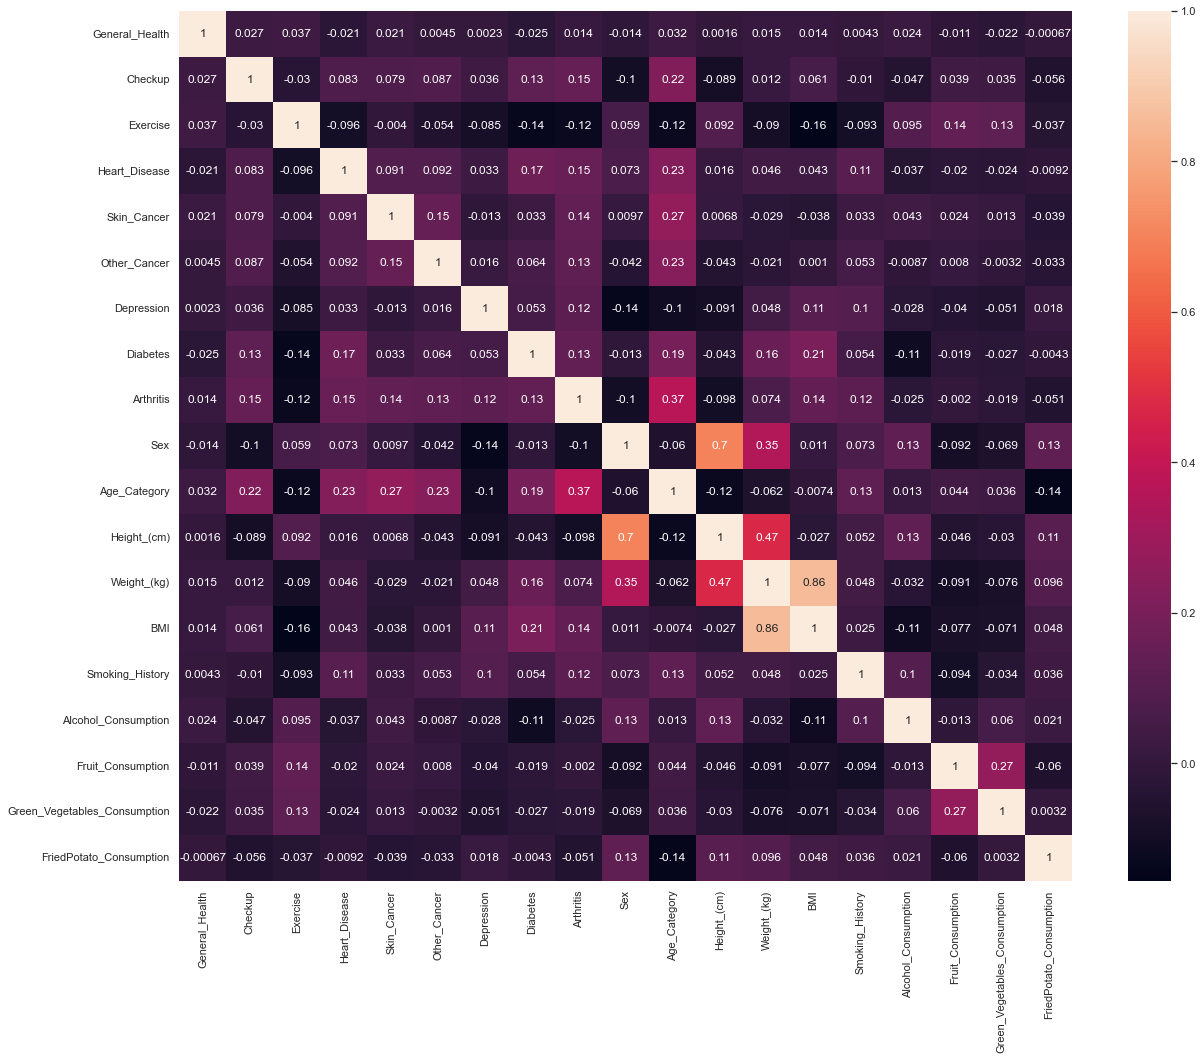

In [29]:
#Correlation Heatmap (print the correlation score each variables)
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), fmt='.2g', annot=True)

In [30]:
from sklearn.model_selection import train_test_split
# Select the features (X) and the target variable (y)
X = df.drop('Heart_Disease', axis=1)
y = df['Heart_Disease']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [55]:
X.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer', 'Other_Cancer',
       'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category',
       'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

In [31]:
# Define the columns for which you want to remove outliers
selected_columns = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 
            'Fruit_Consumption','Green_Vegetables_Consumption', 'FriedPotato_Consumption']

# Calculate the IQR for the selected columns in the training data
Q1 = X_train[selected_columns].quantile(0.25)
Q3 = X_train[selected_columns].quantile(0.75)
IQR = Q3 - Q1

# Set a threshold value for outlier detection (e.g., 1.5 times the IQR)
threshold = 1.5

# Find the indices of outliers based on the threshold
outlier_indices = np.where(
    (X_train[selected_columns] < (Q1 - threshold * IQR)) |
    (X_train[selected_columns] > (Q3 + threshold * IQR))
)[0]

# Remove the outliers from the training data and corresponding labels
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

In [52]:
X_train.shape

(147468, 18)

In [32]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0, max_depth=12, min_samples_leaf=2, min_samples_split=2, class_weight='balanced')
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=12,
                       min_samples_leaf=2, random_state=0)

In [51]:
import pickle

filename = 'finalized_model.sav'
pickle.dump(dtree, open(filename, 'wb'))

In [49]:
from sklearn.metrics import accuracy_score
y_pred = dtree.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 71.45 %


In [34]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))

F-1 Score :  0.7144938563403539
Precision Score :  0.7144938563403539
Recall Score :  0.7144938563403539
Jaccard Score :  0.5558074225194253


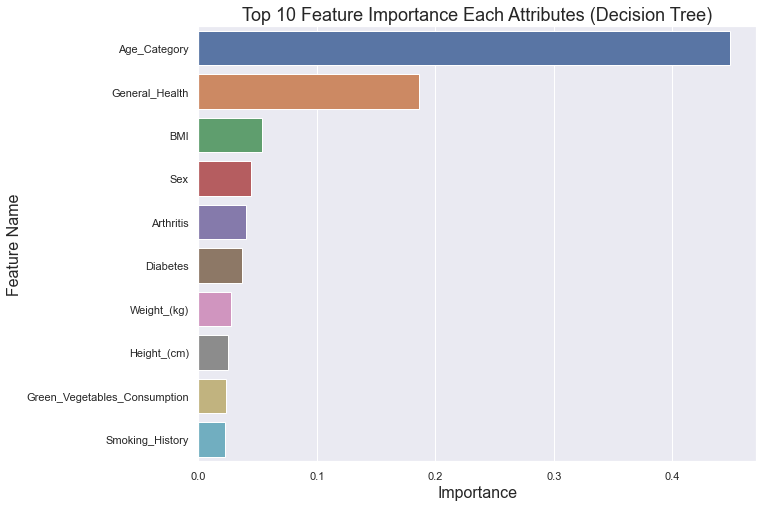

In [35]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

In [38]:
pip install shap


Note: you may need to restart the kernel to use updated packages.


In [39]:
import shap

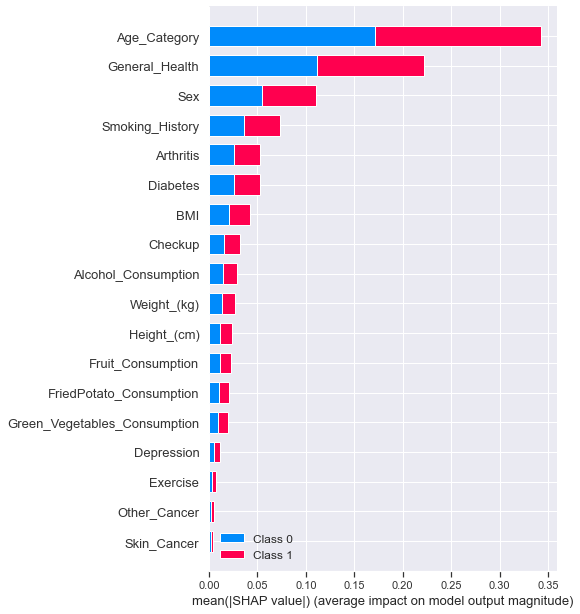

In [40]:
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

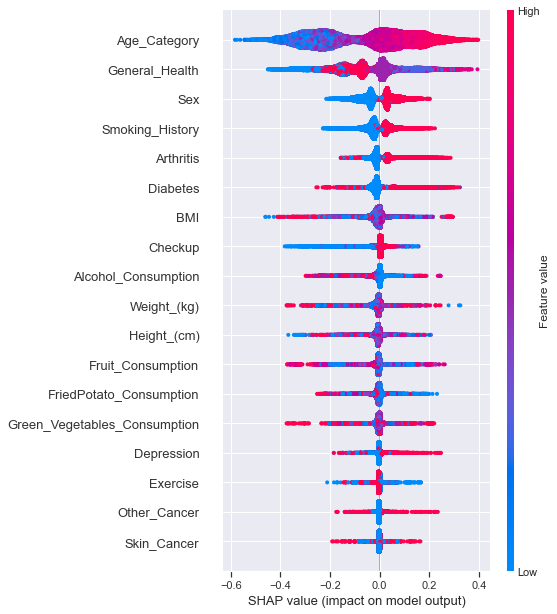

In [41]:
# compute SHAP values
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test.values, feature_names = X_test.columns)

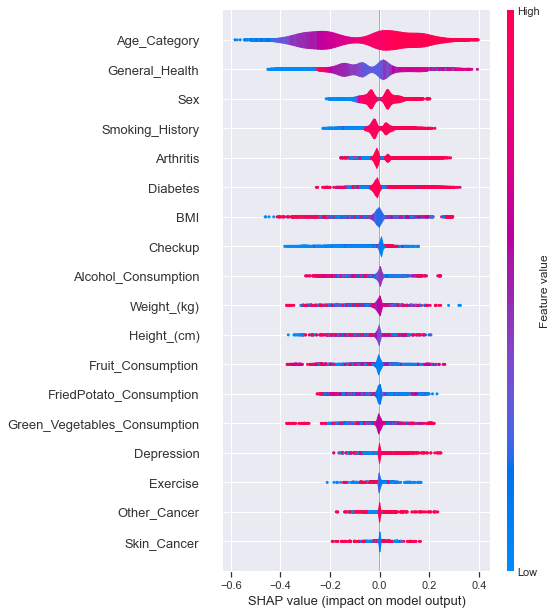

In [42]:
# compute SHAP values
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test.values, feature_names = X_test.columns, plot_type="violin")

Text(0.5, 1.0, 'Accuracy Score for Decision Tree: 0.7144938563403539')

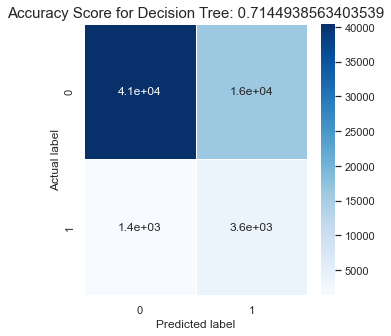

In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Decision Tree: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

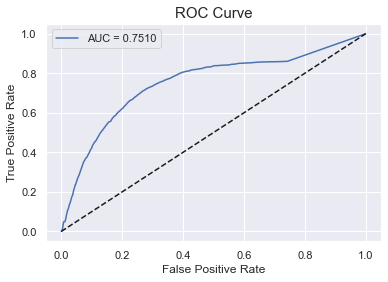

In [44]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = dtree.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

In [45]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0, max_features='sqrt', n_estimators=200, class_weight='balanced')
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features='sqrt',
                       n_estimators=200, random_state=0)

In [57]:
X_train.shape

(147468, 18)

In [56]:
import pickle

filename = 'finalized_model1.sav'
pickle.dump(rfc, open(filename, 'wb'))

In [46]:
y_pred = rfc.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 91.91 %


In [47]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.9191044341195707
Precision Score :  0.9191044341195707
Recall Score :  0.9191044341195707
Jaccard Score :  0.8503175173735922
Log Loss :  2.794035078071055


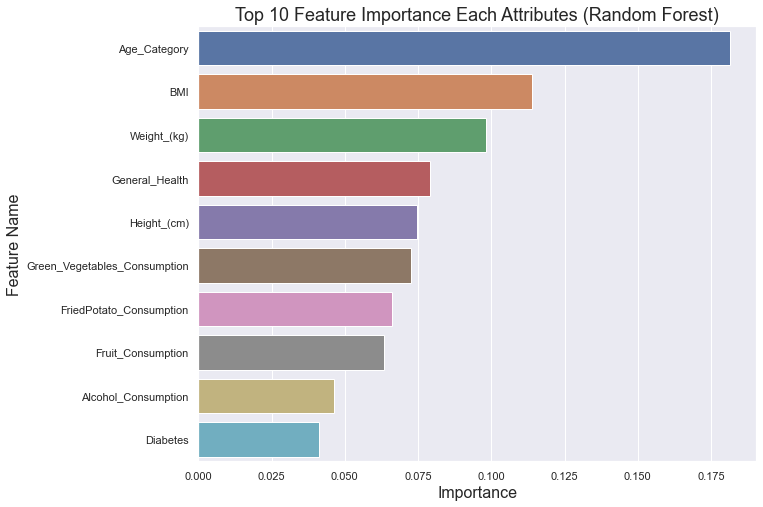

In [48]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rfc.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()